# Tecnológico de Costa Rica 
## MC6104 - Diseño de Experimentos 
### Profesor: M.Sc. Ernesto Rivera-Alvarado
# **Proyecto 02**
#### Estudiantes: 
        2020426569 - Andrey Arguedas Espinoza
        2020426570 - Michael Chen Wang

San José, 25 de Mayo del 2023

In [1]:
if(!require(psych)){install.packages("psych")}
if(!require(FSA)){install.packages("FSA")}
if(!require(ggplot2)){install.packages("ggplot2")}
if(!require(rcompanion)){install.packages("rcompanion")}
if(!require(car)){install.packages("car")}
if(!require(multcompView)){install.packages("multcompView")}
if(!require(multcomp)){install.packages("multcomp")}
if(!require(lsmeans)){install.packages("lsmeans")}
if(!require(phia)){install.packages("phia")}
if(!require(stringr)){install.packages("stringr")}

Loading required package: psych

Loading required package: FSA

## FSA v0.9.4. See citation('FSA') if used in publication.
## Run fishR() for related website and fishR('IFAR') for related book.


Attaching package: 'FSA'


The following object is masked from 'package:psych':

    headtail


Loading required package: ggplot2


Attaching package: 'ggplot2'


The following objects are masked from 'package:psych':

    %+%, alpha


Loading required package: rcompanion


Attaching package: 'rcompanion'


The following object is masked from 'package:psych':

    phi


Loading required package: car

Loading required package: carData

Registered S3 methods overwritten by 'car':
  method       from
  hist.boot    FSA 
  confint.boot FSA 


Attaching package: 'car'


The following object is masked from 'package:FSA':

    bootCase


The following object is masked from 'package:psych':

    logit


Loading required package: multcompView

Loading required package: multcomp

Loading required packag

In [2]:
library(rcompanion)
library(ggplot2)
library(car)
library(repr)
library(dplyr)
library(stringr)
library(data.table)
library(FSA)


Attaching package: 'dplyr'


The following object is masked from 'package:MASS':

    select


The following object is masked from 'package:car':

    recode


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'data.table'


The following objects are masked from 'package:dplyr':

    between, first, last




In [3]:
table <- read.table(
    "datos-auto.txt",
    header=TRUE,
    colClasses = c("factor", "factor", "factor", "factor", "factor", "double", "factor", "factor"))
data <- data.frame(table)
data$Filename <- NULL
data$Accelerator <- NULL
data$Sampler <- NULL
data$Machine <- NULL
data$Time <- as.double(data$Time)
data$OS <- factor(data$OS, levels = c("WSL", "UbuntuVM", "UbuntuNative", "BSD", "Windows"))
headTail(data)
summary(data)
str(data)

,Scene,Configuration,Time,OS,Lot
,<fct>,<fct>,<chr>,<fct>,<fct>
1,bidir,bvh-halton,822.77,UbuntuNative,1
2,bidir,bvh-sobol,892.74,UbuntuNative,1
3,teapot-metal,kdtree-halton,373.64,UbuntuNative,1
4,buddha-fractal,bvh-halton,166.72,UbuntuNative,1
...,NA,NA,...,NA,NA
397,spotfog,kdtree-halton,273.67,UbuntuVM,5
398,spotfog,bvh-halton,205.64,UbuntuVM,5
399,spotfog,kdtree-sobol,267.61,UbuntuVM,5
400,teapot-metal,bvh-sobol,312.66,UbuntuVM,5


            Scene           Configuration      Time                   OS    
 bidir         :100   bvh-halton   :100   Min.   : 137.7   WSL         :80  
 buddha-fractal:100   bvh-sobol    :100   1st Qu.: 222.4   UbuntuVM    :80  
 spotfog       :100   kdtree-halton:100   Median : 311.0   UbuntuNative:80  
 teapot-metal  :100   kdtree-sobol :100   Mean   : 462.5   BSD         :80  
                                          3rd Qu.: 565.1   Windows     :80  
                                          Max.   :1714.4                    
 Lot   
 1:80  
 2:80  
 3:80  
 4:80  
 5:80  
       

'data.frame':	400 obs. of  5 variables:
 $ Scene        : Factor w/ 4 levels "bidir","buddha-fractal",..: 1 1 4 2 3 3 4 1 4 3 ...
 $ Configuration: Factor w/ 4 levels "bvh-halton","bvh-sobol",..: 1 2 3 1 3 1 1 4 4 4 ...
 $ Time         : num  823 893 374 167 309 ...
 $ OS           : Factor w/ 5 levels "WSL","UbuntuVM",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Lot          : Factor w/ 5 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...


In [4]:
# make sure there are no nulls
data[rowSums(is.na(data))!=0,]

Scene,Configuration,Time,OS,Lot
<fct>,<fct>,<dbl>,<fct>,<fct>


In [5]:
# make sure everything looks ok
table(data$OS)
table(data$Configuration)
table(data$Lot)



         WSL     UbuntuVM UbuntuNative          BSD      Windows 
          80           80           80           80           80 


   bvh-halton     bvh-sobol kdtree-halton  kdtree-sobol 
          100           100           100           100 


 1  2  3  4  5 
80 80 80 80 80 

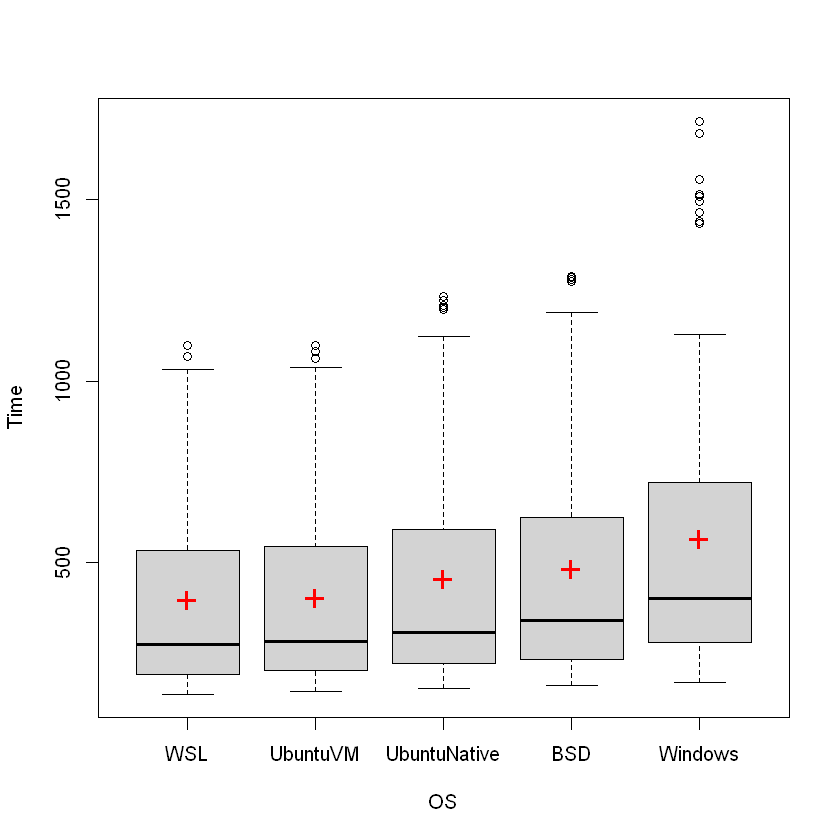

In [6]:
# Diagrama de cajas - Recordar que los bigotes es el rango
M = tapply(data$Time, INDEX = data$OS, FUN = mean)
boxplot(Time ~ OS, data = data)
points(M, col="red", pch="+", cex=2)

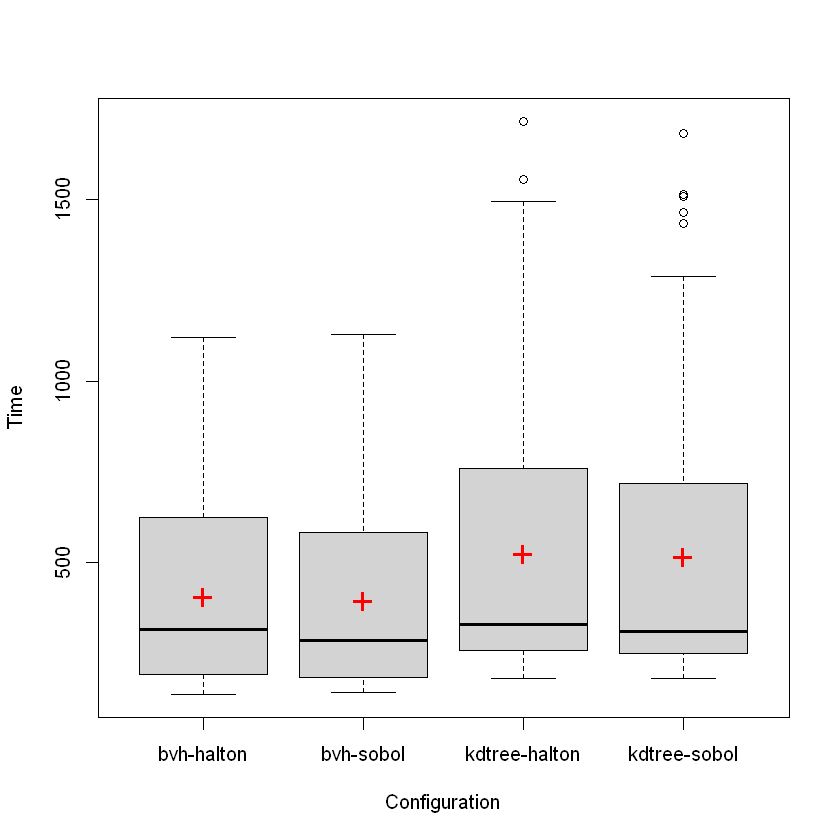

In [7]:
# Diagrama de cajas - Recordar que los bigotes es el rango
M = tapply(data$Time, INDEX = data$Configuration, FUN = mean)
boxplot(Time ~ Configuration, data = data)
points(M, col="red", pch="+", cex=2)

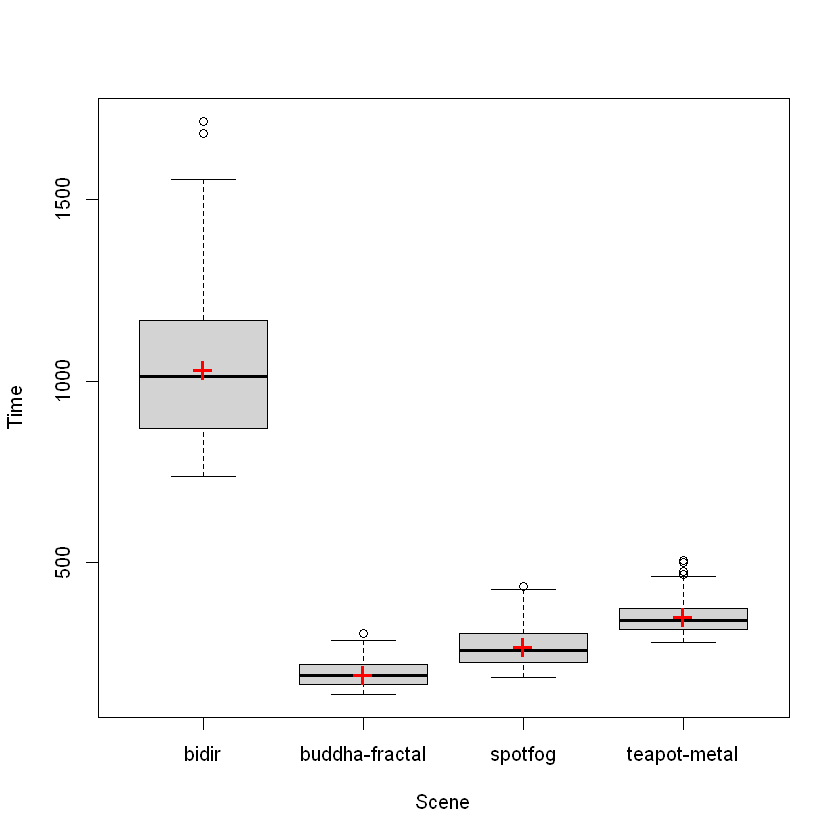

In [8]:
# Diagrama de cajas - Recordar que los bigotes es el rango
M = tapply(data$Time, INDEX = data$Scene, FUN = mean)
boxplot(Time ~ Scene, data = data)
points(M, col="red", pch="+", cex=2)

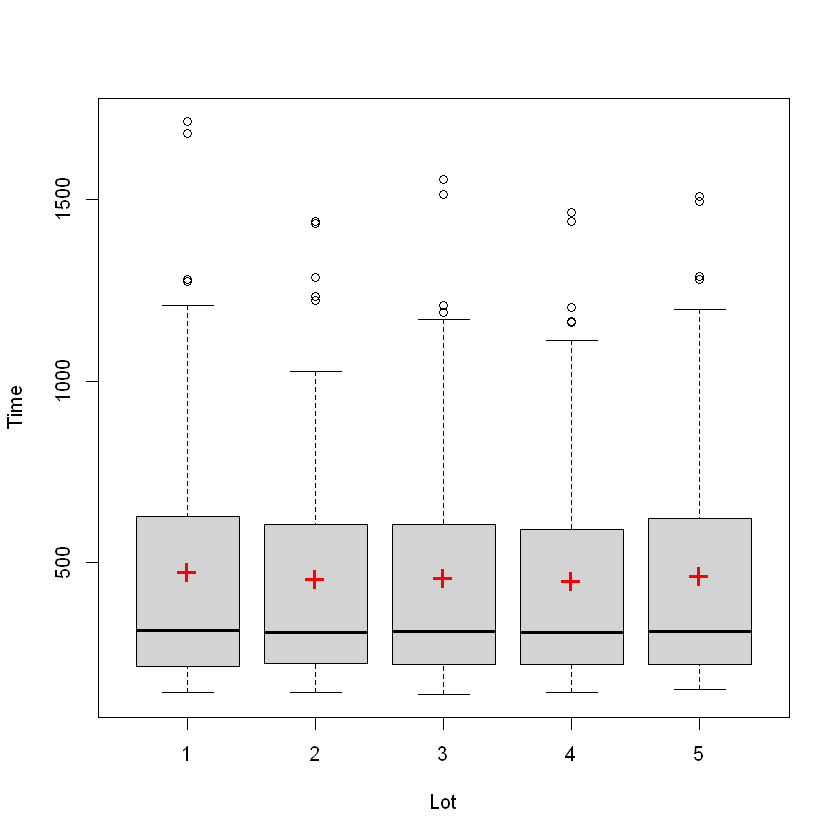

In [9]:
# Diagrama de cajas - Recordar que los bigotes es el rango
M = tapply(data$Time, INDEX = data$Lot, FUN = mean)
boxplot(Time ~ Lot, data = data)
points(M, col="red", pch="+", cex=2)

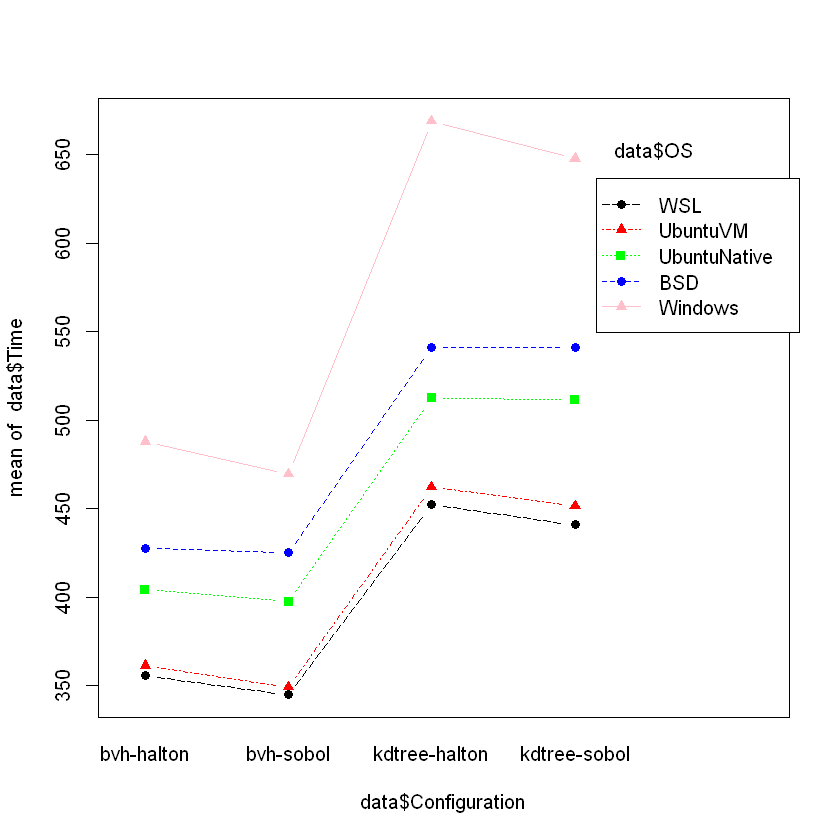

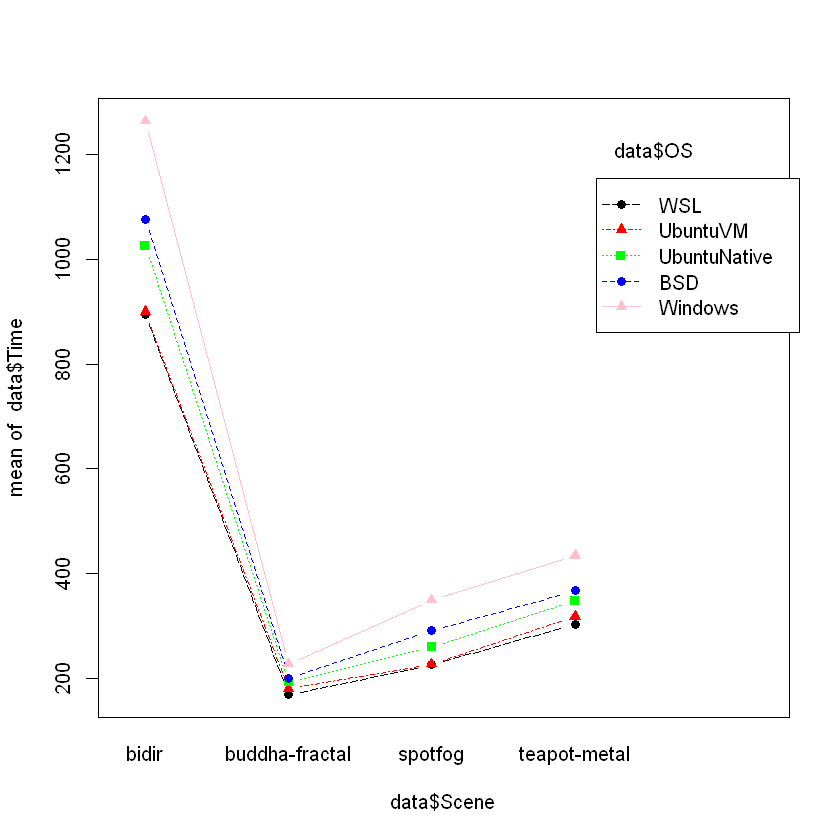

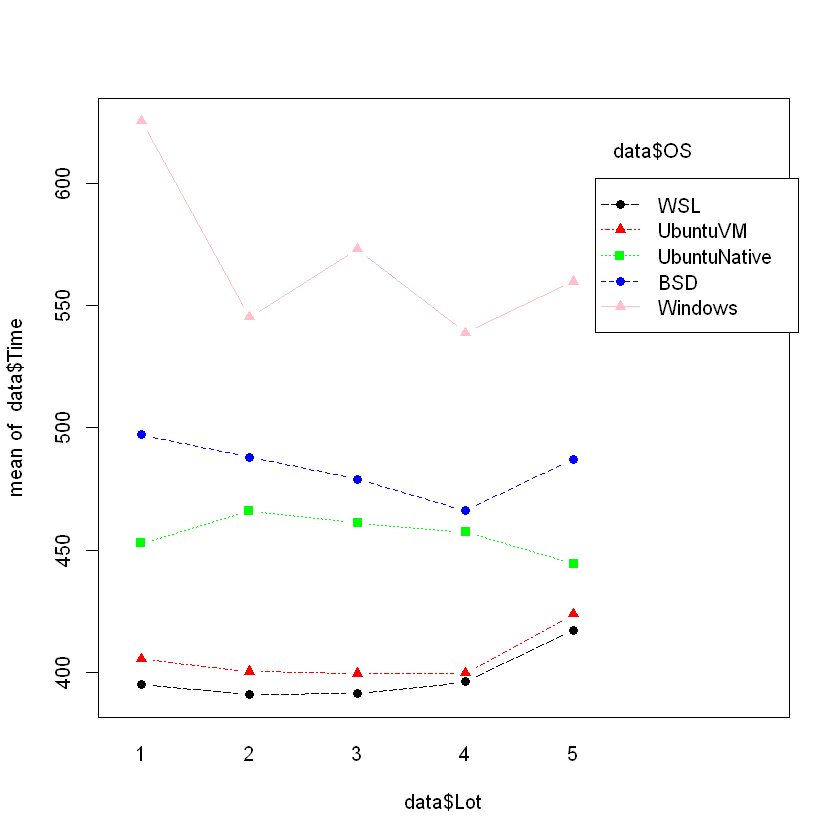

In [10]:
#Grafico simple de interaccion, se hace antes de analisis de varianzas y modelos

interaction.plot(x.factor= data$Configuration,
                 trace.factor= data$OS,
                 response = data$Time,
                 fun=mean, type="b", col=c("black", "red", "green", "blue", "pink"),
                 pch=c(19,17,15), fixed=TRUE, leg.bty="o")

#TODO: Find a way to represent this more visible
interaction.plot(x.factor= data$Scene,
                 trace.factor= data$OS,
                 response = data$Time,
                 fun=mean, type="b", col=c("black", "red", "green", "blue", "pink"),
                 pch=c(19,17,15), fixed=TRUE, leg.bty="o")

interaction.plot(x.factor= data$Lot,
                 trace.factor= data$OS,
                 response = data$Time,
                 fun=mean, type="b", col=c("black", "red", "green", "blue", "pink"),
                 pch=c(19,17,15), fixed=TRUE, leg.bty="o")


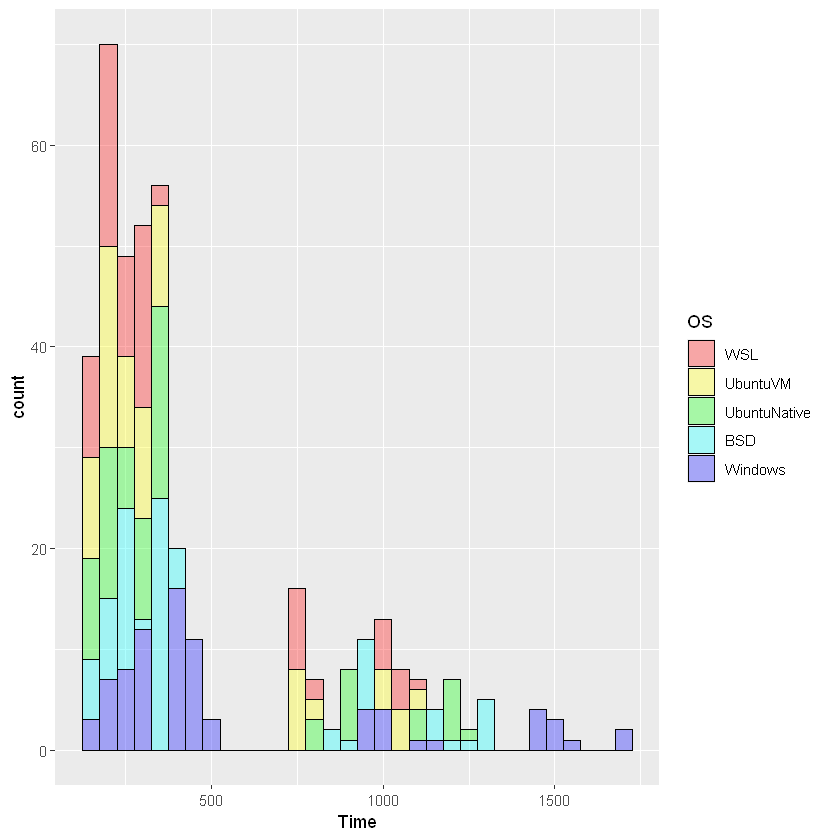

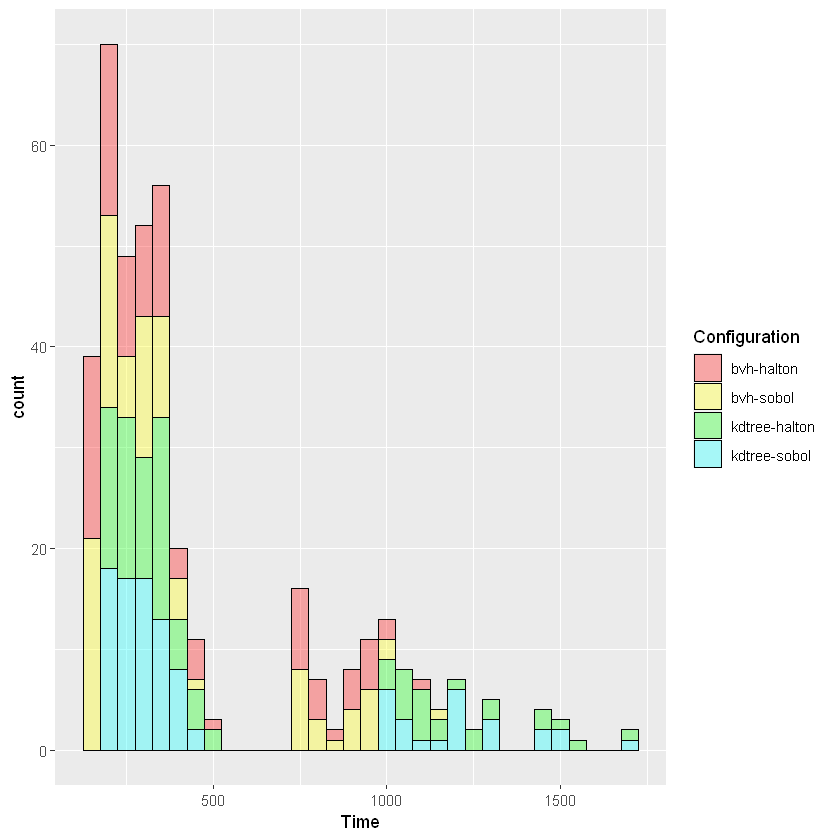

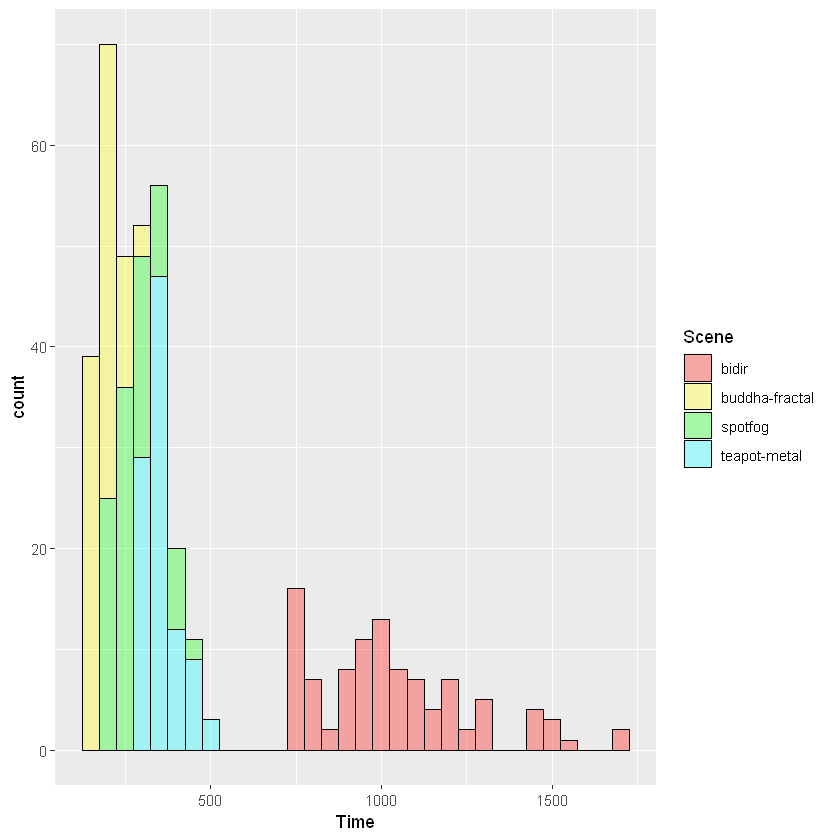

In [11]:
ggplot(data, aes(x=Time, fill=OS)) +
  geom_histogram(color='black', alpha=0.4, binwidth = 50) +
  scale_fill_manual(values=rainbow(6, s = 0.8))

ggplot(data, aes(x=Time, fill=Configuration)) +
  geom_histogram(color='black', alpha=0.4, binwidth = 50) +
  scale_fill_manual(values=rainbow(6, s = 0.8))

ggplot(data, aes(x=Time, fill=Scene)) +
  geom_histogram(color='black', alpha=0.4, binwidth = 50) +
  scale_fill_manual(values=rainbow(6, s = 0.8))

## Chequeamos Homocedasticidad

In [12]:
leveneTest(Time ~ OS * Scene * Configuration, data=data)

T_sqrt = sqrt(data$Time)
leveneTest(T_sqrt ~ OS * Scene * Configuration, data=data)

T_cube = sign(data$Time) * abs(data$Time)^(1/3)
leveneTest(T_cube ~ OS * Scene * Configuration, data=data)

T_log = log(data$Time)
leveneTest(T_log ~ OS * Scene * Configuration, data=data)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,79,2.076882,4.692274e-06
,320,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,79,1.303224,0.05898832
,320,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,79,1.064983,0.3475865
,320,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,79,0.7895946,0.8961707
,320,NA,NA


From the levene test, we can see that we will need to do some data transformation. The transformation that will be applied is Root Square.

## Modelo Lineal

In [13]:
model = lm(T_sqrt ~ OS * Scene * Configuration, data=data)
Anova(model, type="II")

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
OS,694.91715,4,782.689978,8.365154e-164
Scene,19490.20219,3,29269.265707,0.000000e+00
Configuration,614.91966,3,923.451014,3.586338e-157
OS:Scene,96.42750,12,36.202321,1.578842e-52
OS:Configuration,19.59821,12,7.357866,5.959774e-12
Scene:Configuration,373.98985,9,187.212155,7.875760e-122
OS:Scene:Configuration,19.41425,36,2.429600,2.351378e-05
Residuals,71.02860,320,NA,NA


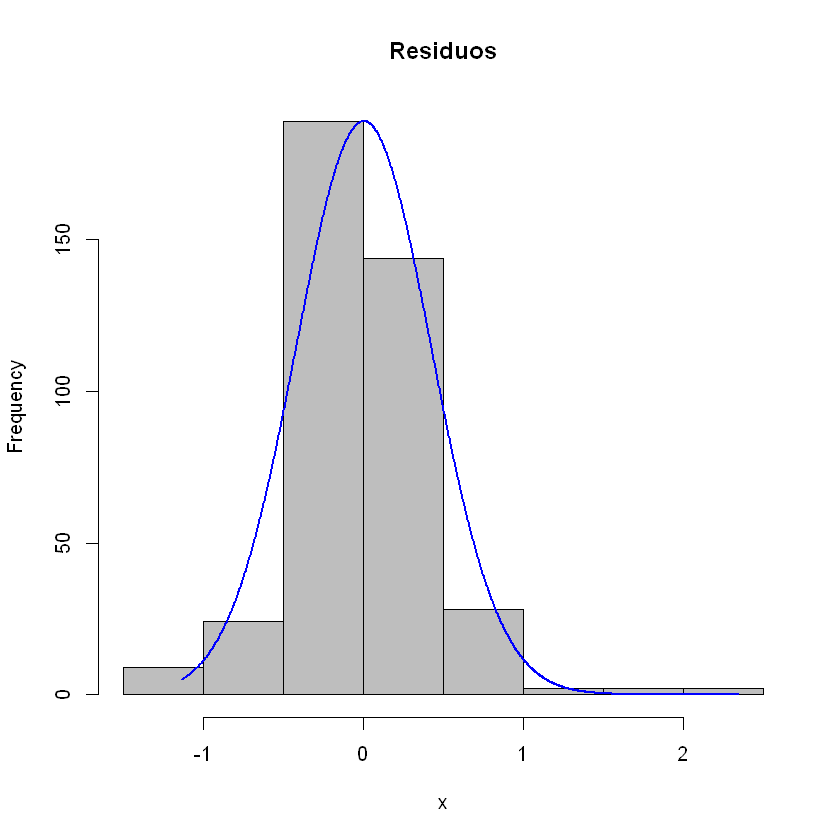

In [14]:
x = residuals(model)
plotNormalHistogram(x, main="Residuos")

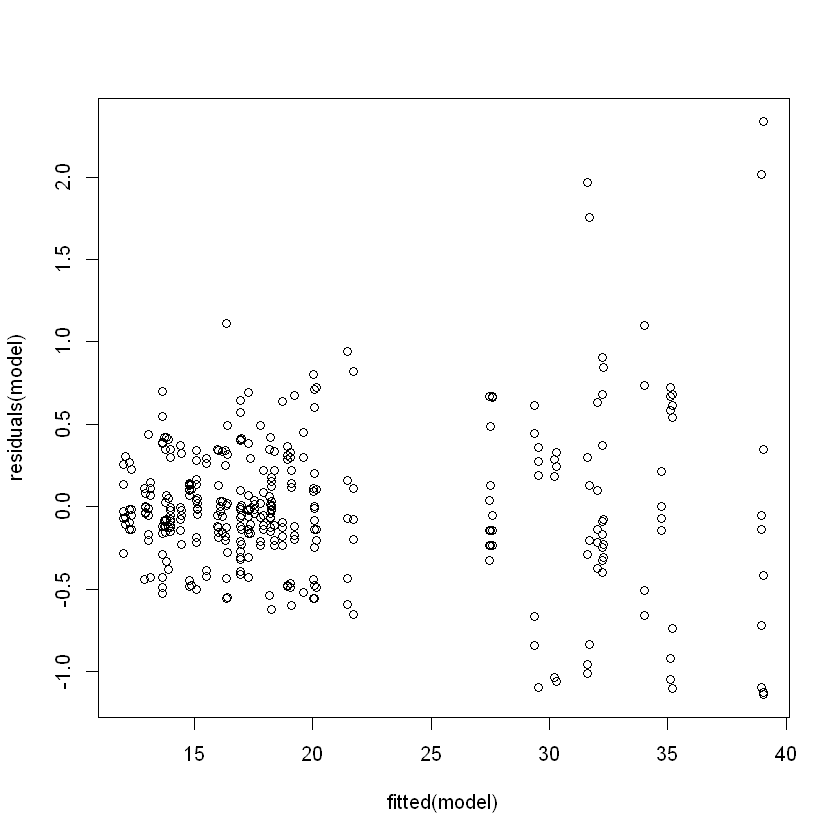

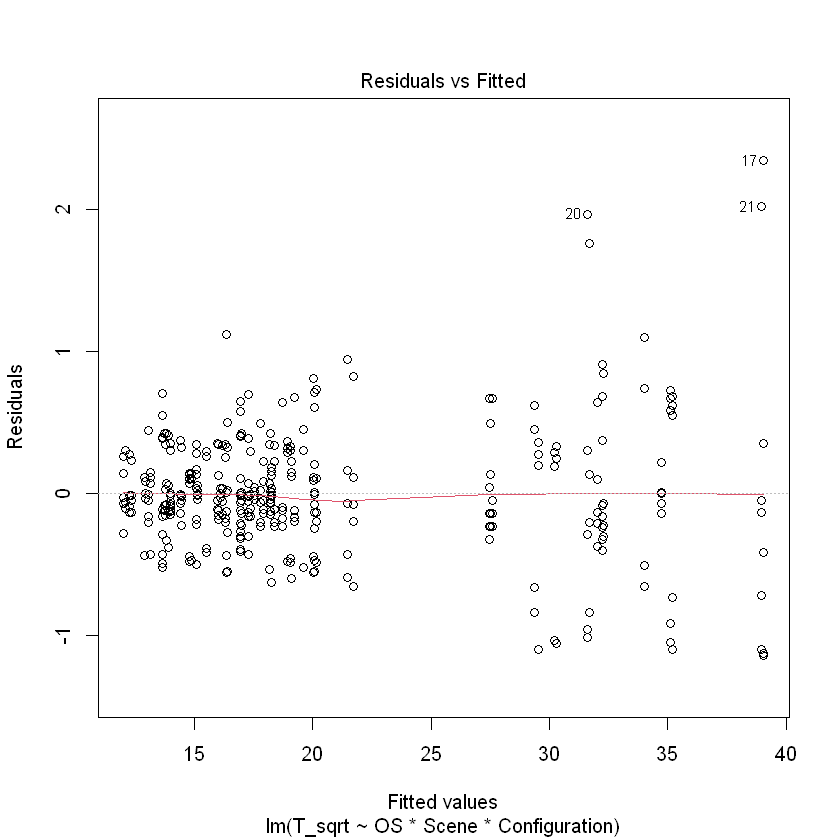

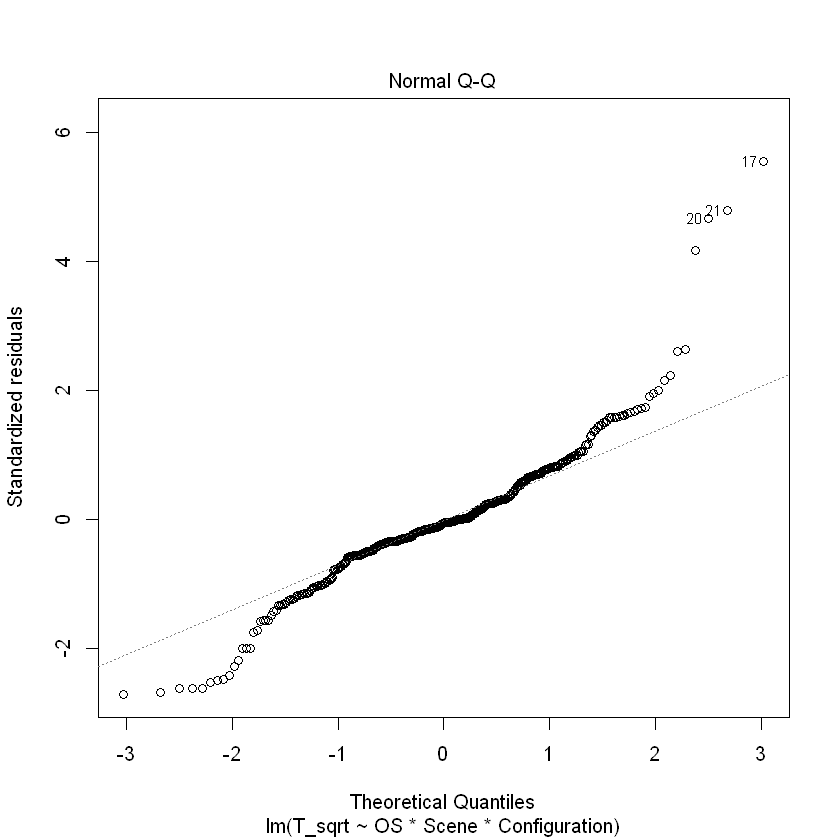

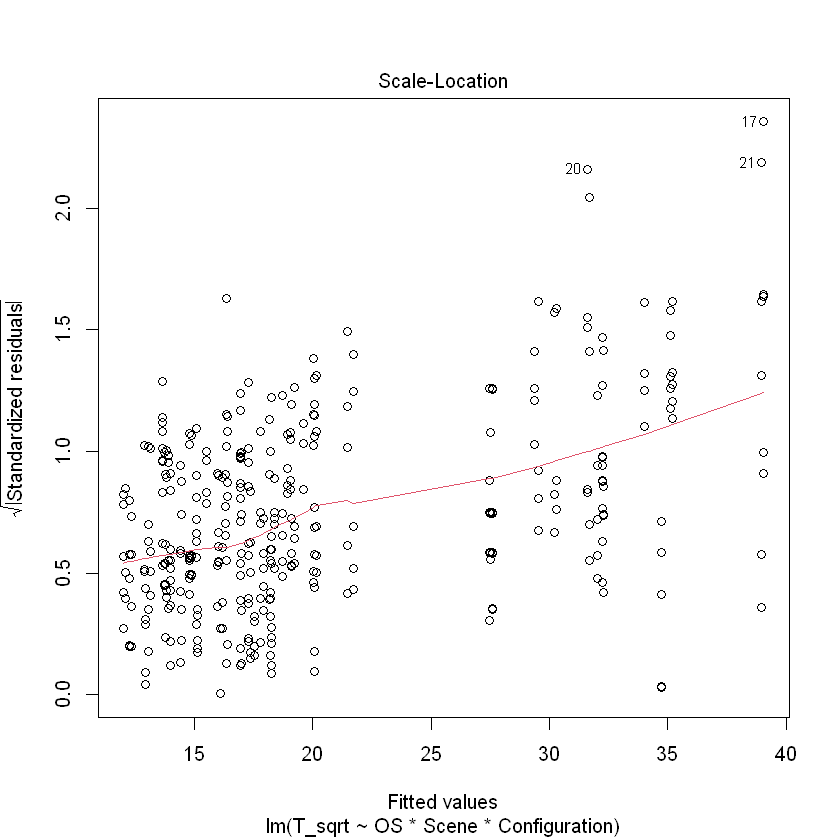

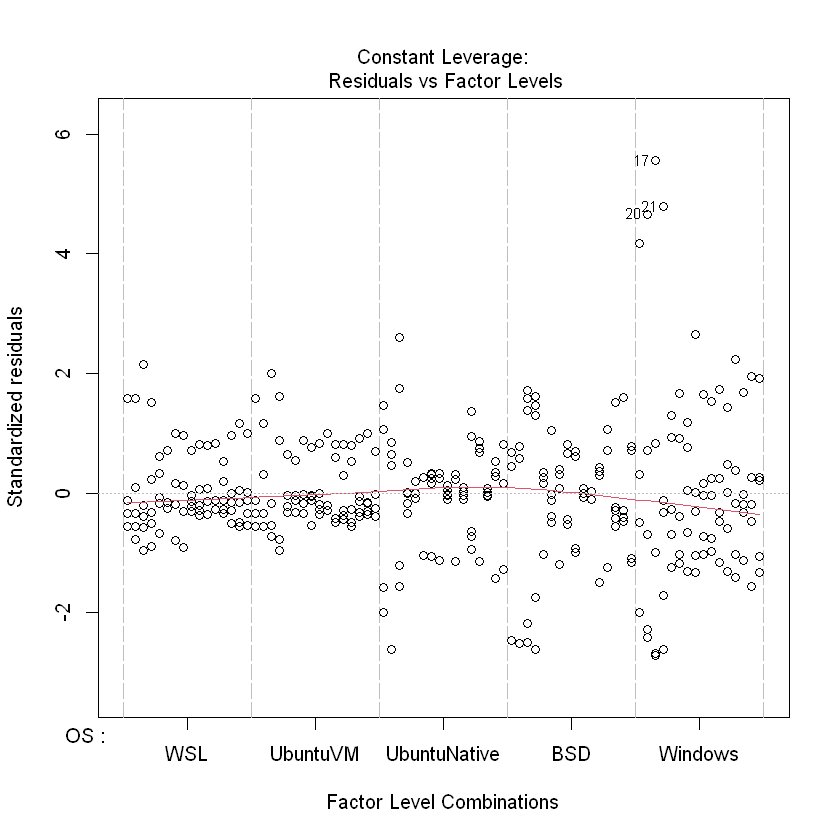

In [15]:
plot(fitted(model), residuals(model))
plot(model)

## Analisis Post-Hoc

NOTE: Results may be misleading due to involvement in interactions



 OS           lsmean      SE  df lower.CL upper.CL .group
 WSL           18.80 0.05267 320    18.66    18.93  a    
 UbuntuVM      19.02 0.05267 320    18.88    19.16   b   
 UbuntuNative  20.12 0.05267 320    19.99    20.26    c  
 BSD           20.74 0.05267 320    20.61    20.88     d 
 Windows       22.44 0.05267 320    22.31    22.58      e

Results are averaged over the levels of: Scene, Configuration 
Confidence level used: 0.95 
Conf-level adjustment: sidak method for 5 estimates 
P value adjustment: sidak method for 10 tests 
significance level used: alpha = 0.05 
NOTE: If two or more means share the same grouping symbol,
      then we cannot show them to be different.
      But we also did not show them to be the same. 


 contrast                estimate     SE  df t.ratio p.value
 WSL - UbuntuVM            -0.225 0.0745 320  -3.014  0.0232
 WSL - UbuntuNative        -1.327 0.0745 320 -17.812  <.0001
 WSL - BSD                 -1.947 0.0745 320 -26.131  <.0001
 WSL - Windows             -3.646 0.0745 320 -48.945  <.0001
 UbuntuVM - UbuntuNative   -1.102 0.0745 320 -14.799  <.0001
 UbuntuVM - BSD            -1.722 0.0745 320 -23.117  <.0001
 UbuntuVM - Windows        -3.422 0.0745 320 -45.932  <.0001
 UbuntuNative - BSD        -0.620 0.0745 320  -8.319  <.0001
 UbuntuNative - Windows    -2.319 0.0745 320 -31.133  <.0001
 BSD - Windows             -1.699 0.0745 320 -22.814  <.0001

Results are averaged over the levels of: Scene, Configuration 
P value adjustment: tukey method for comparing a family of 5 estimates 

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


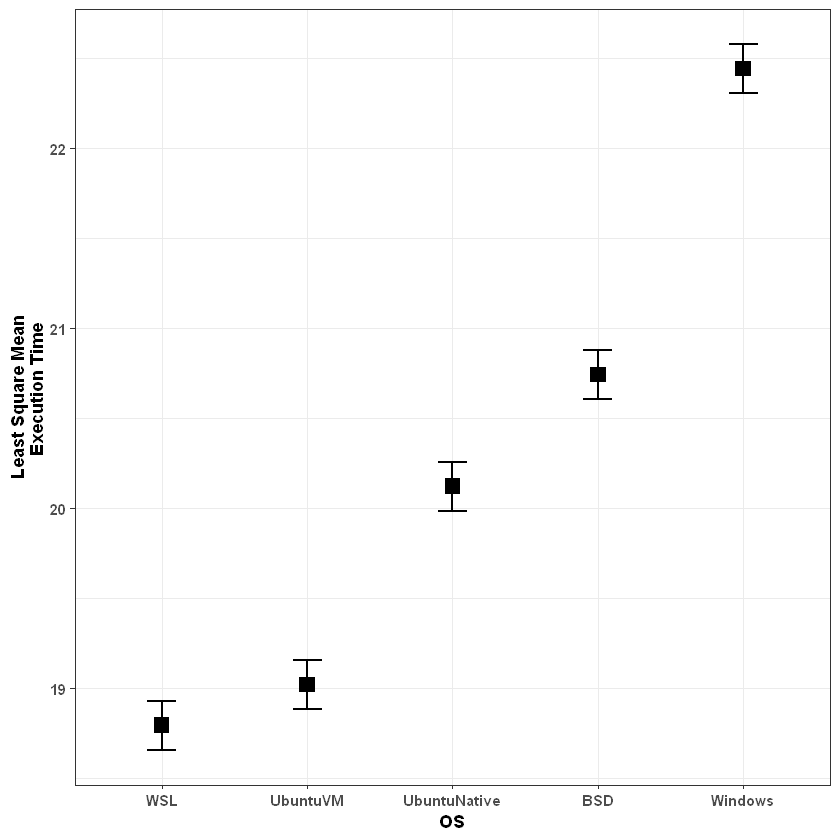

In [16]:
marginal = lsmeans(model, pairwise ~ OS, adjust="tucky")
CLD = cld(marginal, alpha = 0.05, Letters = letters, adjust = "sidak")
print(CLD)
pairs(marginal, adjust = "tukey")

library(ggplot2)
ggplot(CLD,
    aes(x = OS,
    y = lsmean,
    label = .group)) +
    geom_point(shape = 15,
    size = 4) + geom_errorbar(aes(ymin = lower.CL,
    ymax = upper.CL),
    width = 0.2,
    size = 0.7) +
    theme_bw() +
    theme(axis.title = element_text(face = "bold"),
    axis.text = element_text(face = "bold"),
    plot.caption = element_text(hjust = 0)) +
    ylab("Least Square Mean\n   Execution Time")

NOTE: Results may be misleading due to involvement in interactions



 OS           Configuration lsmean    SE  df lower.CL upper.CL .group     
 WSL          bvh-sobol       17.6 0.105 320     17.3     17.9  a         
 UbuntuVM     bvh-sobol       17.7 0.105 320     17.4     18.0  a         
 WSL          bvh-halton      17.9 0.105 320     17.6     18.2  a         
 UbuntuVM     bvh-halton      18.1 0.105 320     17.7     18.4  a         
 UbuntuNative bvh-sobol       18.9 0.105 320     18.5     19.2   b        
 UbuntuNative bvh-halton      19.1 0.105 320     18.8     19.4   bc       
 BSD          bvh-sobol       19.5 0.105 320     19.2     19.9    cd      
 BSD          bvh-halton      19.6 0.105 320     19.3     19.9    cd      
 WSL          kdtree-sobol    19.7 0.105 320     19.4     20.0     d      
 WSL          kdtree-halton   20.0 0.105 320     19.7     20.3     de     
 UbuntuVM     kdtree-sobol    20.0 0.105 320     19.7     20.3     de     
 UbuntuVM     kdtree-halton   20.3 0.105 320     20.0     20.6      ef    
 Windows      bvh-sobol  

 contrast                                                   estimate    SE  df
 (WSL bvh-halton) - (UbuntuVM bvh-halton)                   -0.17536 0.149 320
 (WSL bvh-halton) - (UbuntuNative bvh-halton)               -1.20904 0.149 320
 (WSL bvh-halton) - (BSD bvh-halton)                        -1.73516 0.149 320
 (WSL bvh-halton) - (Windows bvh-halton)                    -3.13967 0.149 320
 (WSL bvh-halton) - (WSL bvh-sobol)                          0.29636 0.149 320
 (WSL bvh-halton) - (UbuntuVM bvh-sobol)                     0.15826 0.149 320
 (WSL bvh-halton) - (UbuntuNative bvh-sobol)                -0.98687 0.149 320
 (WSL bvh-halton) - (BSD bvh-sobol)                         -1.67156 0.149 320
 (WSL bvh-halton) - (Windows bvh-sobol)                     -2.69834 0.149 320
 (WSL bvh-halton) - (WSL kdtree-halton)                     -2.12870 0.149 320
 (WSL bvh-halton) - (UbuntuVM kdtree-halton)                -2.42651 0.149 320
 (WSL bvh-halton) - (UbuntuNative kdtree-halton)    

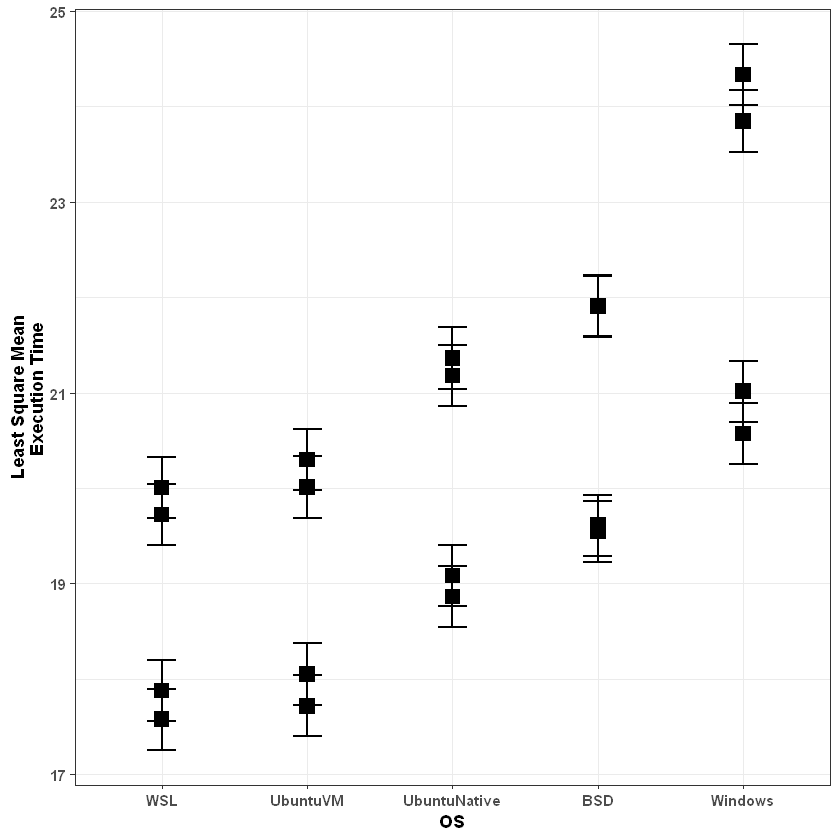

In [17]:
marginal = lsmeans(model, pairwise ~ OS + Configuration, adjust="tucky")
CLD = cld(marginal, alpha = 0.05, Letters = letters, adjust = "sidak")
print(CLD)
pairs(marginal, adjust = "tukey")

library(ggplot2)
ggplot(CLD,
    aes(x = OS,
    y = lsmean,
    label = .group)) +
    geom_point(shape = 15,
    size = 4) + geom_errorbar(aes(ymin = lower.CL,
    ymax = upper.CL),
    width = 0.2,
    size = 0.7) +
    theme_bw() +
    theme(axis.title = element_text(face = "bold"),
    axis.text = element_text(face = "bold"),
    plot.caption = element_text(hjust = 0)) +
    ylab("Least Square Mean\n   Execution Time")

NOTE: Results may be misleading due to involvement in interactions



 OS           Scene          lsmean    SE  df lower.CL upper.CL .group        
 WSL          buddha-fractal   13.0 0.105 320     12.6     13.3  a            
 UbuntuVM     buddha-fractal   13.4 0.105 320     13.0     13.7  ab           
 UbuntuNative buddha-fractal   13.9 0.105 320     13.5     14.2   bc          
 BSD          buddha-fractal   14.1 0.105 320     13.8     14.4    c          
 WSL          spotfog          15.0 0.105 320     14.7     15.3     d         
 Windows      buddha-fractal   15.0 0.105 320     14.7     15.3     d         
 UbuntuVM     spotfog          15.0 0.105 320     14.7     15.3     d         
 UbuntuNative spotfog          16.1 0.105 320     15.8     16.4      e        
 BSD          spotfog          17.0 0.105 320     16.7     17.3       f       
 WSL          teapot-metal     17.4 0.105 320     17.1     17.7       fg      
 UbuntuVM     teapot-metal     17.8 0.105 320     17.5     18.1        g      
 Windows      spotfog          18.6 0.105 320     18

 contrast                                                    estimate    SE  df
 WSL bidir - UbuntuVM bidir                                  -0.06473 0.149 320
 WSL bidir - UbuntuNative bidir                              -2.07859 0.149 320
 WSL bidir - BSD bidir                                       -2.87886 0.149 320
 WSL bidir - Windows bidir                                   -5.50418 0.149 320
 WSL bidir - (WSL buddha-fractal)                            16.87167 0.149 320
 WSL bidir - (UbuntuVM buddha-fractal)                       16.46797 0.149 320
 WSL bidir - (UbuntuNative buddha-fractal)                   15.96842 0.149 320
 WSL bidir - (BSD buddha-fractal)                            15.73356 0.149 320
 WSL bidir - (Windows buddha-fractal)                        14.82366 0.149 320
 WSL bidir - WSL spotfog                                     14.83966 0.149 320
 WSL bidir - UbuntuVM spotfog                                14.81948 0.149 320
 WSL bidir - UbuntuNative spotfog       

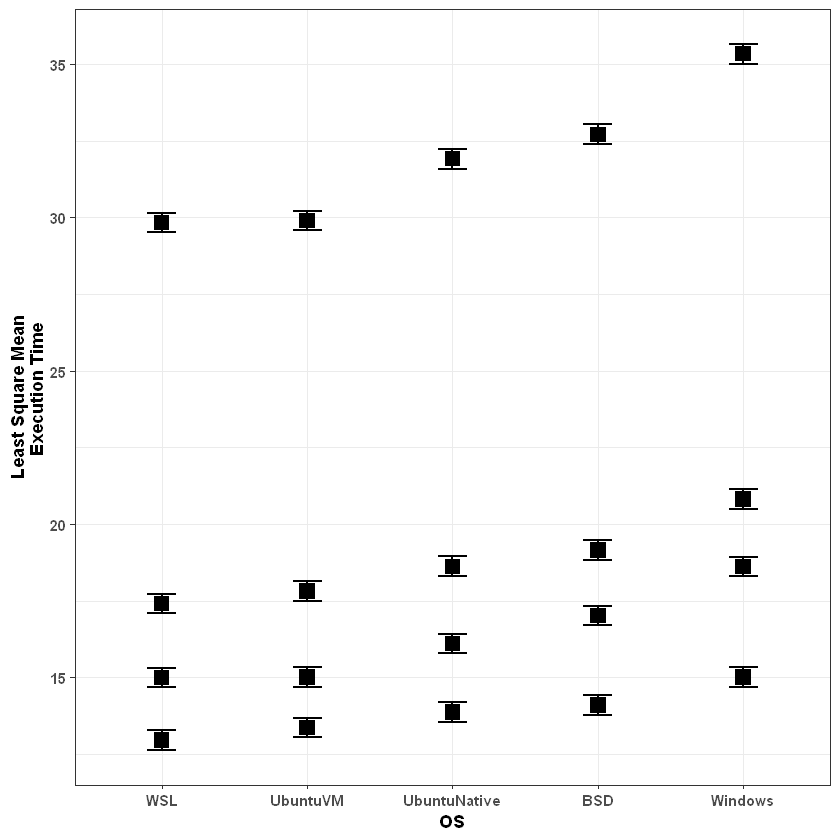

In [18]:
marginal = lsmeans(model, pairwise ~ OS + Scene, adjust="tucky")
CLD = cld(marginal, alpha = 0.05, Letters = letters, adjust = "sidak")
print(CLD)
pairs(marginal, adjust = "tukey")

library(ggplot2)
ggplot(CLD,
    aes(x = OS,
    y = lsmean,
    label = .group)) +
    geom_point(shape = 15,
    size = 4) + geom_errorbar(aes(ymin = lower.CL,
    ymax = upper.CL),
    width = 0.2,
    size = 0.7) +
    theme_bw() +
    theme(axis.title = element_text(face = "bold"),
    axis.text = element_text(face = "bold"),
    plot.caption = element_text(hjust = 0)) +
    ylab("Least Square Mean\n   Execution Time")

## Graficos Finales

OS,Configuration,n,mean,sd,min,Q1,median,Q3,max,se
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
WSL,bvh-halton,20,355.4367,249.0353,137.6900,182.0929,259.9879,433.2077,797.6080,55.7
UbuntuVM,bvh-halton,20,361.1414,247.3848,146.7676,182.9285,267.3502,449.4855,797.8420,55.3
UbuntuNative,bvh-halton,20,404.1266,280.9778,165.7692,212.9758,285.6308,482.6992,897.9224,62.8
BSD,bvh-halton,20,427.4000,298.1555,162.0000,214.5000,306.5000,514.0000,929.0000,66.7
Windows,bvh-halton,20,487.7050,324.4557,171.8406,262.7577,379.2469,614.6979,1118.7469,72.6
WSL,bvh-sobol,20,344.8529,249.1568,143.6784,177.5705,239.9638,410.4818,792.5912,55.7
UbuntuVM,bvh-sobol,20,349.0564,247.4029,148.7070,178.6349,247.1480,420.1673,782.7041,55.3
UbuntuNative,bvh-sobol,20,397.4769,288.2084,154.7399,195.6817,277.6234,452.9062,892.7353,64.4
BSD,bvh-sobol,20,424.9000,300.6614,165.0000,239.0000,301.0000,495.2500,939.0000,67.2


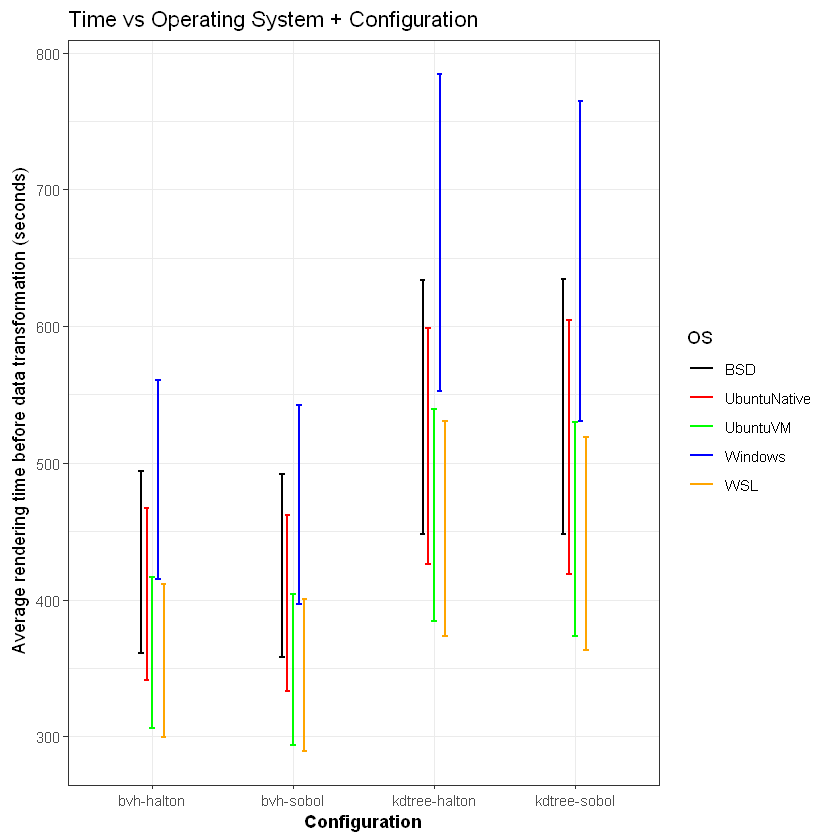

In [19]:
Sum = Summarize(Time ~ OS + Configuration, data=data, digits=4)

Sum$se = Sum$sd / sqrt(Sum$n)
Sum$se = signif(Sum$se, digits=3)
Sum

library(ggplot2)

pd=position_dodge(.2)

ggplot(Sum, aes(x = Configuration, y = mean, color = OS)) +
  geom_errorbar(aes(ymin = mean - se, ymax = mean + se), width = 0.2, size = 0.7, position = pd) +
  theme_bw() + theme(axis.title = element_text(face="bold")) +
  scale_color_manual(values=c("black", "red", "green", "blue", "orange")) +
  ylab (expression("Average rendering time before data transformation (seconds)")) +
  ggtitle("Time vs Operating System + Configuration")

OS,Scene,n,mean,sd,min,Q1,median,Q3,max,se
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
WSL,bidir,20,895.3664,142.9162,737.5902,751.3571,900.1140,1023.8843,1097.6363,32.00
UbuntuVM,bidir,20,899.5123,146.9070,742.6788,751.5934,905.3269,1027.7658,1097.7856,32.80
UbuntuNative,bidir,20,1024.7810,167.2607,807.7173,887.7026,1005.3567,1204.0896,1233.1201,37.40
BSD,bidir,20,1076.4500,171.2359,850.0000,929.0000,1049.5000,1275.2500,1289.0000,38.30
Windows,bidir,20,1263.4094,279.8804,936.5486,988.7937,1280.9570,1497.2383,1714.4494,62.60
WSL,buddha-fractal,20,168.8246,24.7864,137.6900,144.6671,167.7811,190.6140,204.8574,5.54
UbuntuVM,buddha-fractal,20,179.7583,29.7075,146.7676,150.5184,179.8455,207.2514,218.9978,6.64
UbuntuNative,buddha-fractal,20,193.1607,28.0834,154.7399,168.2159,187.3908,222.9130,224.9798,6.28
BSD,buddha-fractal,20,199.8000,29.5877,162.0000,173.7500,197.5000,229.7500,238.0000,6.62


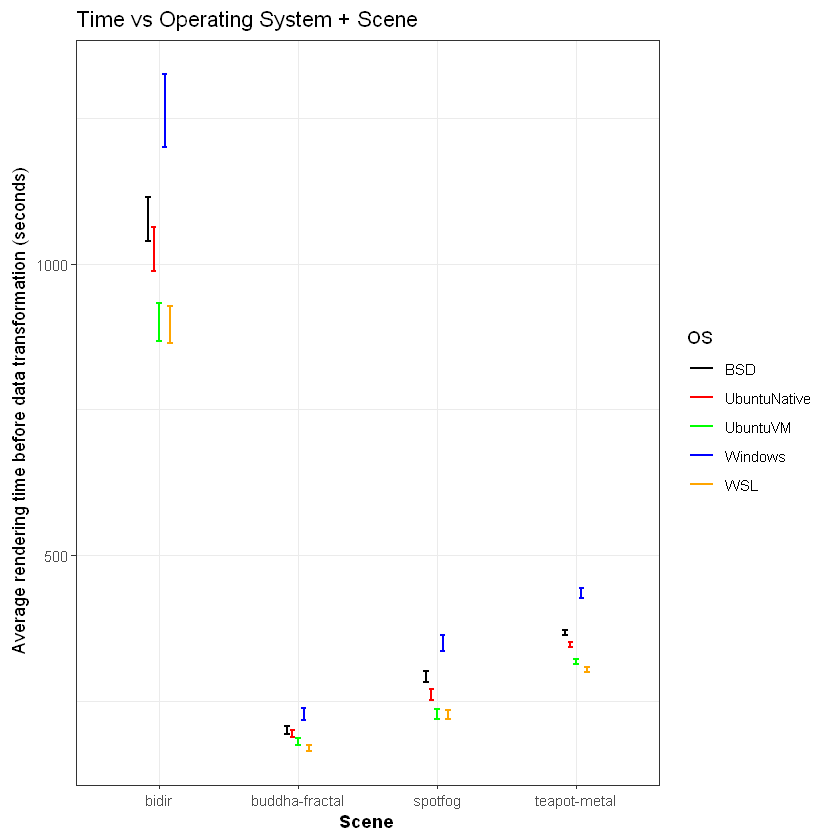

In [20]:
Sum = Summarize(Time ~ OS + Scene, data=data, digits=4)

Sum$se = Sum$sd / sqrt(Sum$n)
Sum$se = signif(Sum$se, digits=3)
Sum

library(ggplot2)

pd=position_dodge(.2)

ggplot(Sum, aes(x = Scene, y = mean, color = OS)) +
  geom_errorbar(aes(ymin = mean - se, ymax = mean + se), width = 0.2, size = 0.7, position = pd) +
  theme_bw() + theme(axis.title = element_text(face="bold")) +
  scale_color_manual(values=c("black", "red", "green", "blue", "orange")) +
  ylab (expression("Average rendering time before data transformation (seconds)")) +
  ggtitle("Time vs Operating System + Scene")

## Grafico Principal

OS,n,mean,sd,min,Q1,median,Q3,max,se
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
WSL,80,18.7960,6.7516,11.7341,13.8851,16.6420,20.4849,33.1306,0.755
UbuntuVM,80,19.0205,6.6817,12.1148,14.2621,16.8860,20.8460,33.1328,0.747
UbuntuNative,80,20.1229,7.2169,12.4394,14.9322,17.6013,21.6024,35.1158,0.807
BSD,80,20.7426,7.3464,12.7279,15.3378,18.4662,22.3261,35.9026,0.821
Windows,80,22.4421,8.0969,13.1088,16.8038,20.0335,24.5489,41.4059,0.905


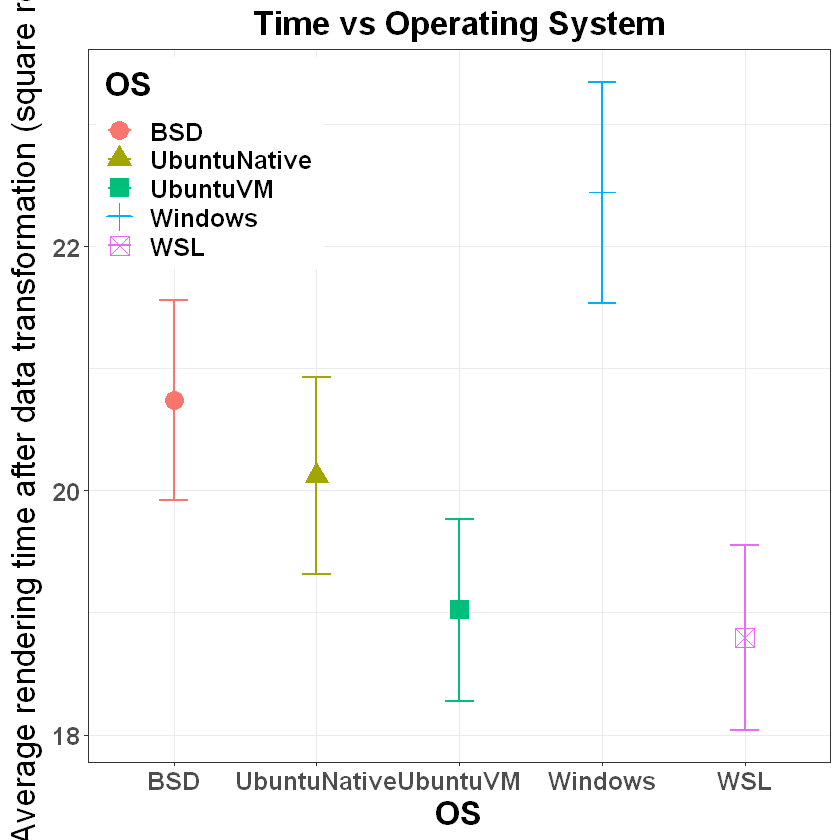

In [21]:
## datos transformados

Sum = Summarize(T_sqrt ~ OS, data=data, digits=4)

Sum$se = Sum$sd / sqrt(Sum$n)
Sum$se = signif(Sum$se, digits=3)
Sum

library(ggplot2)

pd=position_dodge(.2)

q = ggplot ( Sum , aes (x= OS , y=mean , color = OS ) ) +
    geom_errorbar ( aes ( ymin = mean - se , ymax = mean + se) , width =.2 , size =0.7 , position = pd ) +
    geom_point ( aes ( shape = OS ) , size =5 , position = pd ) + theme_bw () +
    theme ( plot.title = element_text ( face ="bold", size =20 , hjust =0.5) ,
            axis.title = element_text ( face ="bold", size =20) ,
            axis.text = element_text ( face ="bold", size =15) ,
            plot.caption = element_text ( hjust =0) ,
            legend.text = element_text ( face ="bold", size =15) ,
            legend.title = element_text ( face ="bold", size =20) ,
            legend.justification = c(0 ,1) , legend.position =c (0.01 , 0.99) ) +
  ylab (expression("Average rendering time after data transformation (square root)")) +
  ggtitle("Time vs Operating System")

ggsave(plot=q, width=10, height=8, dpi=800, filename="principal_sqrt.png")
q

OS,n,mean,sd,min,Q1,median,Q3,max,se
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
WSL,80,353.2896,45.58410,11.7341,13.8851,16.6420,20.4849,33.1306,5.10
UbuntuVM,80,361.7794,44.64511,12.1148,14.2621,16.8860,20.8460,33.1328,4.99
UbuntuNative,80,404.9311,52.08365,12.4394,14.9322,17.6013,21.6024,35.1158,5.82
BSD,80,430.2555,53.96959,12.7279,15.3378,18.4662,22.3261,35.9026,6.03
Windows,80,503.6479,65.55979,13.1088,16.8038,20.0335,24.5489,41.4059,7.33


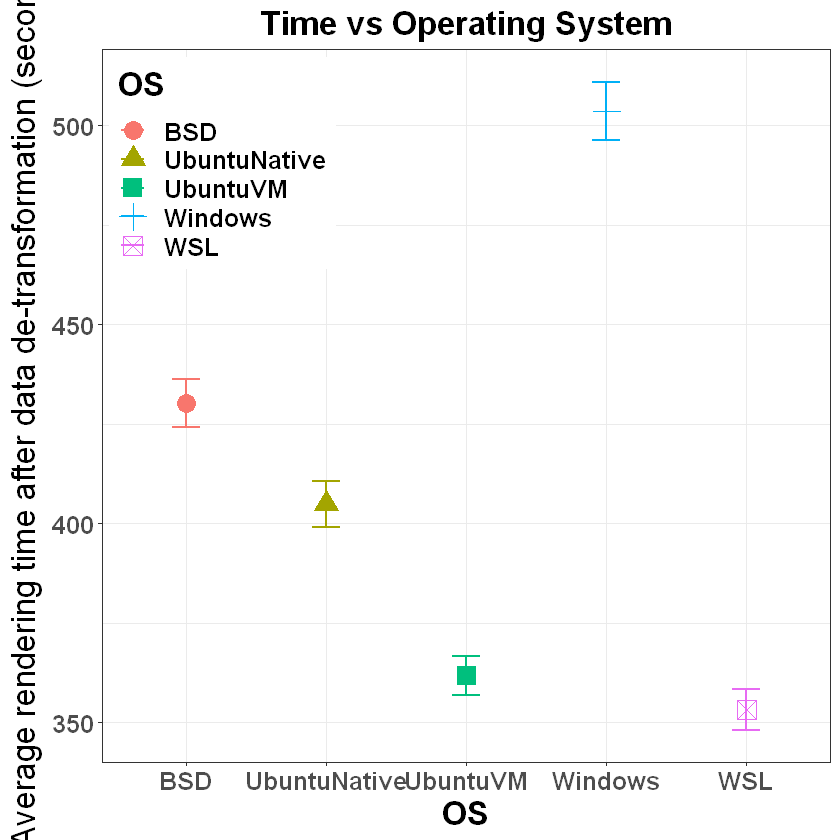

In [22]:
## datos des-transformados

Sum = Summarize(T_sqrt ~ OS, data=data, digits=4)

Sum$mean = Sum$mean ^ 2
Sum$sd = Sum$sd ^ 2

Sum$se = Sum$sd / sqrt(Sum$n)
Sum$se = signif(Sum$se, digits=3)
Sum

library(ggplot2)

pd=position_dodge(.2)

q = ggplot ( Sum , aes (x= OS , y=mean , color = OS ) ) +
    geom_errorbar ( aes ( ymin = mean - se , ymax = mean + se) , width =.2 , size =0.7 , position = pd ) +
    geom_point ( aes ( shape = OS ) , size =5 , position = pd ) + theme_bw () +
    theme ( plot.title = element_text ( face ="bold", size =20 , hjust =0.5) ,
            axis.title = element_text ( face ="bold", size =20) ,
            axis.text = element_text ( face ="bold", size =15) ,
            plot.caption = element_text ( hjust =0) ,
            legend.text = element_text ( face ="bold", size =15) ,
            legend.title = element_text ( face ="bold", size =20) ,
            legend.justification = c(0 ,1) , legend.position =c (0.01 , 0.99) ) +
  ylab (expression("Average rendering time after data de-transformation (seconds)")) +
  ggtitle("Time vs Operating System")

ggsave(plot=q, width=10, height=8, dpi=800, filename="principal.png")
q

## Interactions

OS,Configuration,n,mean,sd,min,Q1,median,Q3,max,se
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
WSL,bvh-halton,20,17.876,6.147,11.734,13.476,16.031,20.427,28.242,1.37
UbuntuVM,bvh-halton,20,18.051,6.096,12.115,13.513,16.240,20.869,28.246,1.36
UbuntuNative,bvh-halton,20,19.085,6.481,12.875,14.566,16.821,21.606,29.965,1.45
BSD,bvh-halton,20,19.611,6.713,12.728,14.626,17.429,22.326,30.480,1.50
Windows,bvh-halton,20,21.015,6.963,13.109,16.169,19.419,24.522,33.448,1.56
WSL,bvh-sobol,20,17.579,6.140,11.987,13.315,15.435,19.811,28.153,1.37
UbuntuVM,bvh-sobol,20,17.717,6.083,12.195,13.358,15.651,20.075,27.977,1.36
UbuntuNative,bvh-sobol,20,18.863,6.624,12.439,13.977,16.579,20.825,29.879,1.48
BSD,bvh-sobol,20,19.547,6.713,12.845,15.419,17.309,21.838,30.643,1.50


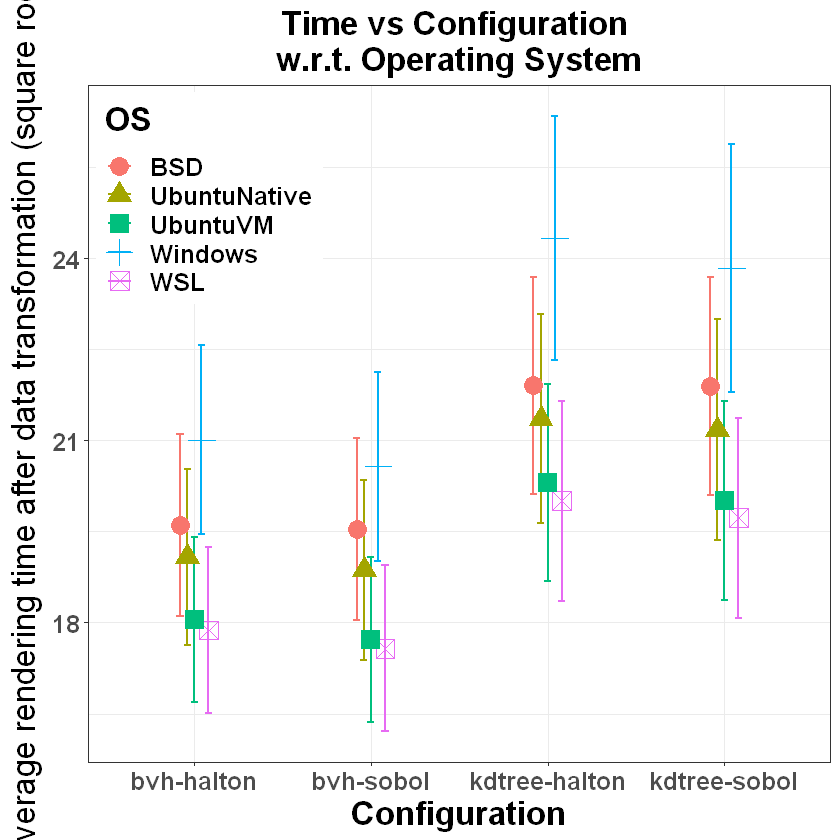

In [23]:
Sum = Summarize (T_sqrt ~ OS + Configuration , data = data , digits =3)
Sum$se = Sum$sd / sqrt ( Sum$n)
Sum$se = signif ( Sum$se , digits =3)
Sum

pd = position_dodge (.2)
ggplot ( Sum , aes (x= Configuration ,y=mean , color = OS ) ) + geom_errorbar( aes ( ymin =  mean - se , ymax = mean + se), width = 0.2 , size =0.7 , position = pd )+
   geom_point ( aes ( shape = OS ) , size =5 , position = pd )+ theme_bw () +
   theme ( plot.title = element_text ( face ="bold", size =20 , hjust =0.5) ,
             axis.title = element_text ( face ="bold", size =20) ,
             axis.text = element_text ( face ="bold", size =15) ,
             plot.caption = element_text ( hjust =0) ,
             legend.text = element_text ( face ="bold", size =15) ,
             legend.title = element_text ( face ="bold", size =20) ,
             legend.justification = c(0 ,1) ,
             legend.position =c (0.01 , 0.99) ) + xlab (" Configuration ") +
ylab (expression("Average rendering time after data transformation (square root)")) +
ggtitle ("Time vs Configuration \n w.r.t. Operating System ")


OS,Configuration,n,mean,sd,min,Q1,median,Q3,max,se
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
WSL,bvh-halton,20,319.5514,37.78561,11.734,13.476,16.031,20.427,28.242,8.45
UbuntuVM,bvh-halton,20,325.8386,37.16122,12.115,13.513,16.240,20.869,28.246,8.31
UbuntuNative,bvh-halton,20,364.2372,42.00336,12.875,14.566,16.821,21.606,29.965,9.39
BSD,bvh-halton,20,384.5913,45.06437,12.728,14.626,17.429,22.326,30.480,10.10
Windows,bvh-halton,20,441.6302,48.48337,13.109,16.169,19.419,24.522,33.448,10.80
WSL,bvh-sobol,20,309.0212,37.69960,11.987,13.315,15.435,19.811,28.153,8.43
UbuntuVM,bvh-sobol,20,313.8921,37.00289,12.195,13.358,15.651,20.075,27.977,8.27
UbuntuNative,bvh-sobol,20,355.8128,43.87738,12.439,13.977,16.579,20.825,29.879,9.81
BSD,bvh-sobol,20,382.0852,45.06437,12.845,15.419,17.309,21.838,30.643,10.10


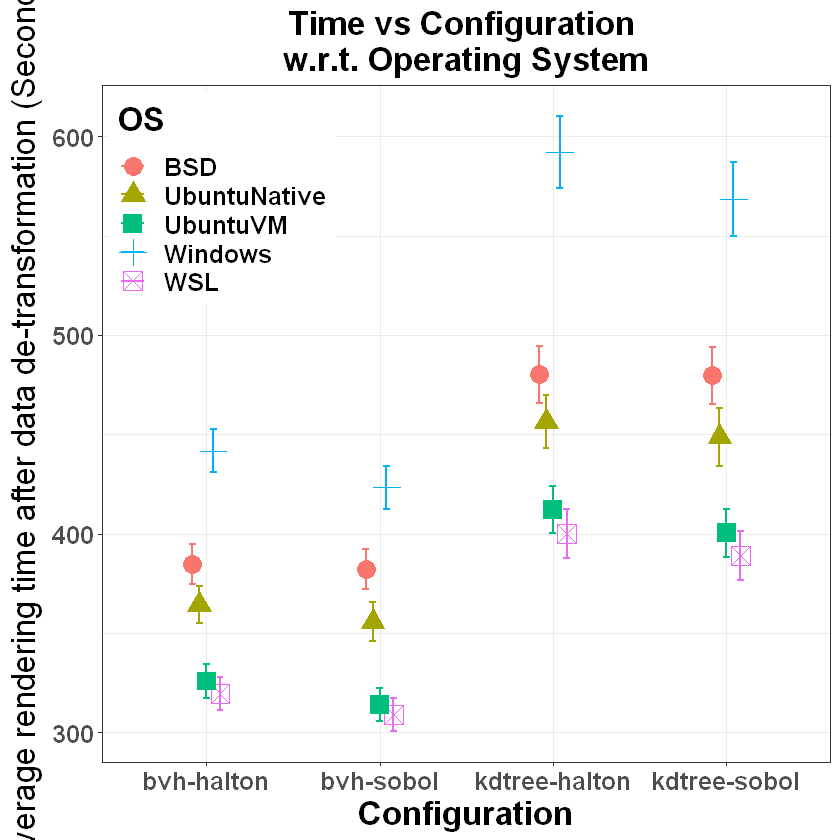

In [24]:
## datos des-transformados

Sum = Summarize (T_sqrt ~ OS + Configuration , data = data , digits =3)

Sum$mean = Sum$mean ^ 2
Sum$sd = Sum$sd ^ 2

Sum$se = Sum$sd / sqrt(Sum$n)
Sum$se = signif(Sum$se, digits=3)
Sum

pd = position_dodge (.2)
ggplot ( Sum , aes (x= Configuration ,y=mean , color = OS ) ) + geom_errorbar( aes ( ymin =  mean - se , ymax = mean + se), width = 0.2 , size =0.7 , position = pd )+
   geom_point ( aes ( shape = OS ) , size =5 , position = pd )+ theme_bw () +
   theme ( plot.title = element_text ( face ="bold", size =20 , hjust =0.5) ,
             axis.title = element_text ( face ="bold", size =20) ,
             axis.text = element_text ( face ="bold", size =15) ,
             plot.caption = element_text ( hjust =0) ,
             legend.text = element_text ( face ="bold", size =15) ,
             legend.title = element_text ( face ="bold", size =20) ,
             legend.justification = c(0 ,1) ,
             legend.position =c (0.01 , 0.99) ) + xlab (" Configuration ") +
ylab (expression("Average rendering time after data de-transformation (Seconds)")) +
ggtitle ("Time vs Configuration \n w.r.t. Operating System ")

## T Tests

In [25]:
output <- pairwise.t.test (T_sqrt, data$OS , p.adjust.method = "BH")
write.csv(output[3], file="pairwise_t_test_os.csv")
output


	Pairwise comparisons using t tests with pooled SD 

data:  T_sqrt and data$OS 

             WSL   UbuntuVM UbuntuNative BSD  
UbuntuVM     0.845 -        -            -    
UbuntuNative 0.353 0.420    -            -    
BSD          0.224 0.230    0.654        -    
Windows      0.015 0.015    0.144        0.230

P value adjustment method: BH 

In [26]:
output <- pairwise.t.test(T_sqrt, data$OS:data$Configuration, p.adjust.method = "BH")
typeof(output)
write.csv(output[3], file="pairwise_t_test_os+configuration.csv")
output[3]

[1] "list"

,WSL:bvh-halton,WSL:bvh-sobol,WSL:kdtree-halton,WSL:kdtree-sobol,UbuntuVM:bvh-halton,UbuntuVM:bvh-sobol,UbuntuVM:kdtree-halton,UbuntuVM:kdtree-sobol,UbuntuNative:bvh-halton,UbuntuNative:bvh-sobol,UbuntuNative:kdtree-halton,UbuntuNative:kdtree-sobol,BSD:bvh-halton,BSD:bvh-sobol,BSD:kdtree-halton,BSD:kdtree-sobol,Windows:bvh-halton,Windows:bvh-sobol,Windows:kdtree-halton
WSL:bvh-sobol,0.9615274,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
WSL:kdtree-halton,0.8055545,0.8048228,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
WSL:kdtree-sobol,0.8165476,0.8055545,0.9615274,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
UbuntuVM:bvh-halton,0.9706519,0.9526742,0.8055545,0.8455029,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
UbuntuVM:bvh-sobol,0.9706519,0.9725686,0.8048228,0.8055545,0.9615274,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
UbuntuVM:kdtree-halton,0.8048228,0.7887256,0.9615274,0.9526742,0.8055545,0.8048228,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
UbuntuVM:kdtree-sobol,0.8055545,0.8048228,0.9975545,0.9615274,0.8055545,0.8048228,0.9615274,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
UbuntuNative:bvh-halton,0.8915935,0.8619243,0.9262794,0.9508657,0.9185547,0.8709546,0.8915935,0.9262794,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
UbuntuNative:bvh-sobol,0.9193189,0.8766460,0.8915935,0.9262794,0.9358772,0.8915935,0.8626617,0.8915935,0.9706519,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
UbuntuNative:kdtree-halton,0.6602738,0.5904399,0.8709546,0.8475087,0.6702260,0.6333577,0.9185547,0.8709546,0.8048228,0.8048228,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [27]:
output <- pairwise.t.test(T_sqrt, data$OS:data$Scene, p.adjust.method = "BH")
typeof(output)
write.csv(output[3], file="pairwise_t_test_os+scene.csv")
output[3]

[1] "list"

,WSL:bidir,WSL:buddha-fractal,WSL:spotfog,WSL:teapot-metal,UbuntuVM:bidir,UbuntuVM:buddha-fractal,UbuntuVM:spotfog,UbuntuVM:teapot-metal,UbuntuNative:bidir,UbuntuNative:buddha-fractal,UbuntuNative:spotfog,UbuntuNative:teapot-metal,BSD:bidir,BSD:buddha-fractal,BSD:spotfog,BSD:teapot-metal,Windows:bidir,Windows:buddha-fractal,Windows:spotfog
WSL:buddha-fractal,1.138685e-106,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
WSL:spotfog,3.594611e-92,2.415136e-04,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
WSL:teapot-metal,5.688800e-74,4.733385e-15,1.409253e-05,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
UbuntuVM:bidir,9.237091e-01,4.668696e-107,1.334044e-92,1.815937e-74,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
UbuntuVM:buddha-fractal,7.072743e-104,4.706399e-01,3.224777e-03,7.877815e-13,2.521645e-104,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
UbuntuVM:spotfog,4.865720e-92,2.116874e-04,9.856410e-01,1.639903e-05,1.715929e-92,2.892171e-03,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
UbuntuVM:teapot-metal,8.554397e-71,1.945481e-17,4.019892e-07,4.666047e-01,2.712557e-71,4.434685e-15,4.743844e-07,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
UbuntuNative:bidir,1.758753e-04,1.473876e-120,6.008176e-107,9.551258e-90,2.713000e-04,5.930969e-118,7.699019e-107,1.118333e-86,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
UbuntuNative:buddha-fractal,2.511320e-100,1.036726e-01,4.200786e-02,2.593068e-10,8.808062e-101,3.710900e-01,3.902982e-02,2.357976e-12,1.289189e-114,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
UbuntuNative:spotfog,6.118487e-84,1.824251e-08,4.642440e-02,1.890790e-02,2.007900e-84,8.542046e-07,5.015495e-02,1.970884e-03,3.256192e-99,5.601280e-05,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [28]:
output <- pairwise.t.test (T_sqrt, data$Configuration, p.adjust.method = "BH")
write.csv(output[3], file="pairwise_t_test_configurations.csv")
output


	Pairwise comparisons using t tests with pooled SD 

data:  T_sqrt and data$Configuration 

              bvh-halton bvh-sobol kdtree-halton
bvh-sobol     0.807      -         -            
kdtree-halton 0.034      0.034     -            
kdtree-sobol  0.048      0.034     0.807        

P value adjustment method: BH 

In [29]:
output <- pairwise.t.test (T_sqrt, data$Scene, p.adjust.method = "BH")
write.csv(output[3], file="pairwise_t_test_scene.csv")
output


	Pairwise comparisons using t tests with pooled SD 

data:  T_sqrt and data$Scene 

               bidir   buddha-fractal spotfog
buddha-fractal < 2e-16 -              -      
spotfog        < 2e-16 1.2e-14        -      
teapot-metal   < 2e-16 < 2e-16        5.2e-14

P value adjustment method: BH 